![隱函數畫圖title](images/implicit.png)

在 $\mathbb{R}^n$ 空間裡, 一個超曲面 (hypersurface) 就是由一個方程式

$$f(x_1, x_2, \ldots, x_n) \colon \mathbb{R}^n \to \mathbb{R}$$

的零根集合。當然, 更嘴 (但清楚) 的是說

$$f^{-1}(\{0\})$$

這個集合就是超曲面。而我們好好想想就會發現, 其實對任意實數 r,

$$f^{-1}(\{r\})$$

也都是可以的...

如果是 $\mathbb{R}^2$, 我們知道一個 $f(x,y)$ 的零根就定義出一個曲線 (當然我們還是可以堅持叫它在 $\mathbb{R}^2$ 的超曲面。

如果 $\mathbb{R}^3$, 就是曲面。

我們要畫圖, 其實就是「隱函數」的畫圖。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## I. 曲線篇

用 `matplotlib` 畫隱函數的圖, 其實有點挑戰。不過原理很簡單, 比如說我們想要畫的是

$$f(x,y)=0$$

這種情況。那基本上就是畫「高度是 0 的等高線」!!

可愛的 Python 怎麼知道求等高線呢 (事實上就等價於 $f(x,y)=0$ 求解), 答案很簡單, 就是發揮電腦的功力, 平面上灑滿點, 再一點一點帶進去!!

### 例子

畫出 Tschirnhausen cubic:

$$f(x,y) = y^2 - x^3 - 3x^2 = 0$$

![meshgrid](images/meshgrid.png)

我們使用 `meshgrid` 來切出格點, 只要切 `x` 和 `y` 軸上的點, 我們就可以切出這些範圍 xy 平面上的格點。但注意格式, 是一列一列的 x 座標和 y 座標分開。

In [2]:
x = np.linspace(-3.5, 2, 200)

In [3]:
y = np.linspace(-2.5, 2.5, 200)

In [4]:
X, Y = np.meshgrid(x, y)

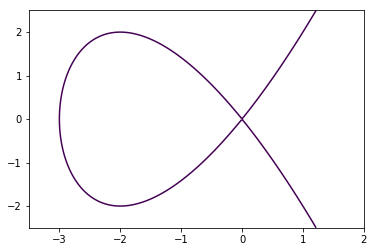

In [9]:
plt.contour(X, Y, Y**2 - X**3 - 3*X**2, [0])

## II. 曲面篇

我們先以大家最熟的 sphere

$$ f(x, y, z) = x^2 + y^2 + z^2 - 4 = 0 $$

來說明。

### 固定 z=k

如果我們設定 $z=k$, 某個常數, 那我們的式子就變成

$$f(x, y, z) = x^2 + y^2 + (k^2 - 4)$$

現在只有兩個變數, 我們就可以畫了!!

比如說, 先令 $k=1$, 意思就是要畫

$$f(x,y) = x^2 + y^2  - 3$$

等於零的情況, 於是...

In [10]:
x = y = np.linspace(-2.5, 2.5, 200)

X, Y = np.meshgrid(x, y)

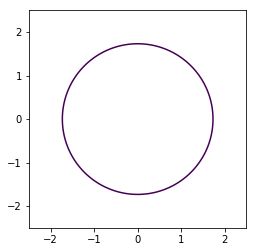

In [13]:
ax = plt.gca()
ax.set_aspect('equal')

plt.contour(X, Y, X**2 + Y**2 - 3, [0])

### 移動 z=k

現在我們來讓 z 上上下下移動, 感受一下這個曲面長什麼樣子...

In [14]:
from ipywidgets import interact

In [15]:
def plot_sphere(z):
    Z = X**2 + Y**2 + (z**2 - 4)
    ax = plt.gca()
    ax.set_aspect('equal')

    plt.contour(X, Y, Z, [0])

In [16]:
interact(plot_sphere, z=(-2., 2.))

interactive(children=(FloatSlider(value=0.0, description='z', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.plot_sphere(z)>

### 畫到三維空間

這樣是不是有點「感受」到這個 sphere 的樣子呢, 不過我們當然更想要的是, 真的畫到一個三維的空間...

In [19]:
K = np.linspace(-1.9, 1.9, 10)

In [21]:
from mpl_toolkits.mplot3d import Axes3D

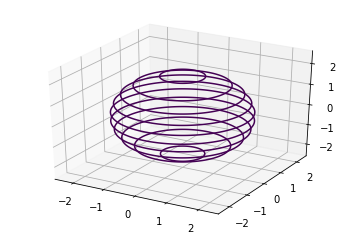

In [35]:
ax = plt.gca(projection='3d')
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.set_zlim(-2.5,2.5)

for z in K:
    Z = X**2 + Y**2 + (z**2 - 4)
    plt.contour(X, Y, Z+z, [z])

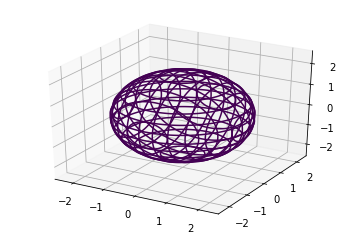

In [34]:
ax = plt.gca(projection='3d')
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.set_zlim(-2.5,2.5)

for z in K:
    Z = X**2 + Y**2 + (z**2 - 4)
    plt.contour(X, Y, Z+z, [z], zdir='z')
    plt.contour(Z+z, X, Y, [z], zdir='x')
    plt.contour(X, Z+z, Y, [z], zdir='y')

### [寫完它]

找一個 $f(x,y,z)$, 畫出以 $f(x,y,z)=0$ 定義出的廿田

[Satck Overflow 畫 3D Implicit Function 的討論](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d?fbclid=IwAR2rlrHF1y2qvMp_TueFH04ZYeERcZQkR_XKM6WRuDyQEikYvjf81gCdX2c)